### Import Libraries

In [39]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Import Data

In [40]:
df=pd.read_csv('StudentsPerformance.csv')

### Inspect Data

In [41]:
df.head()
#There are three scores. May create an additional score 
#  that averages all three. Each of the scores will be a target 
#  variable/feature


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [42]:
df.info()
# There are 1000 rows of data and 8 columns/features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [43]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [44]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [45]:
# Create a final/overall score from math, reading, and writing

df['overall score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,overall score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


### Data Exploration: Overall Performance by Gender and (Race/ethnicity, Parental level of education, lunch type, and test preparation


In [46]:
df['overall score'].describe()

count    1000.000000
mean       67.770667
std        14.257326
min         9.000000
25%        58.333333
50%        68.333333
75%        77.666667
max       100.000000
Name: overall score, dtype: float64

C:\Users\dewum\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


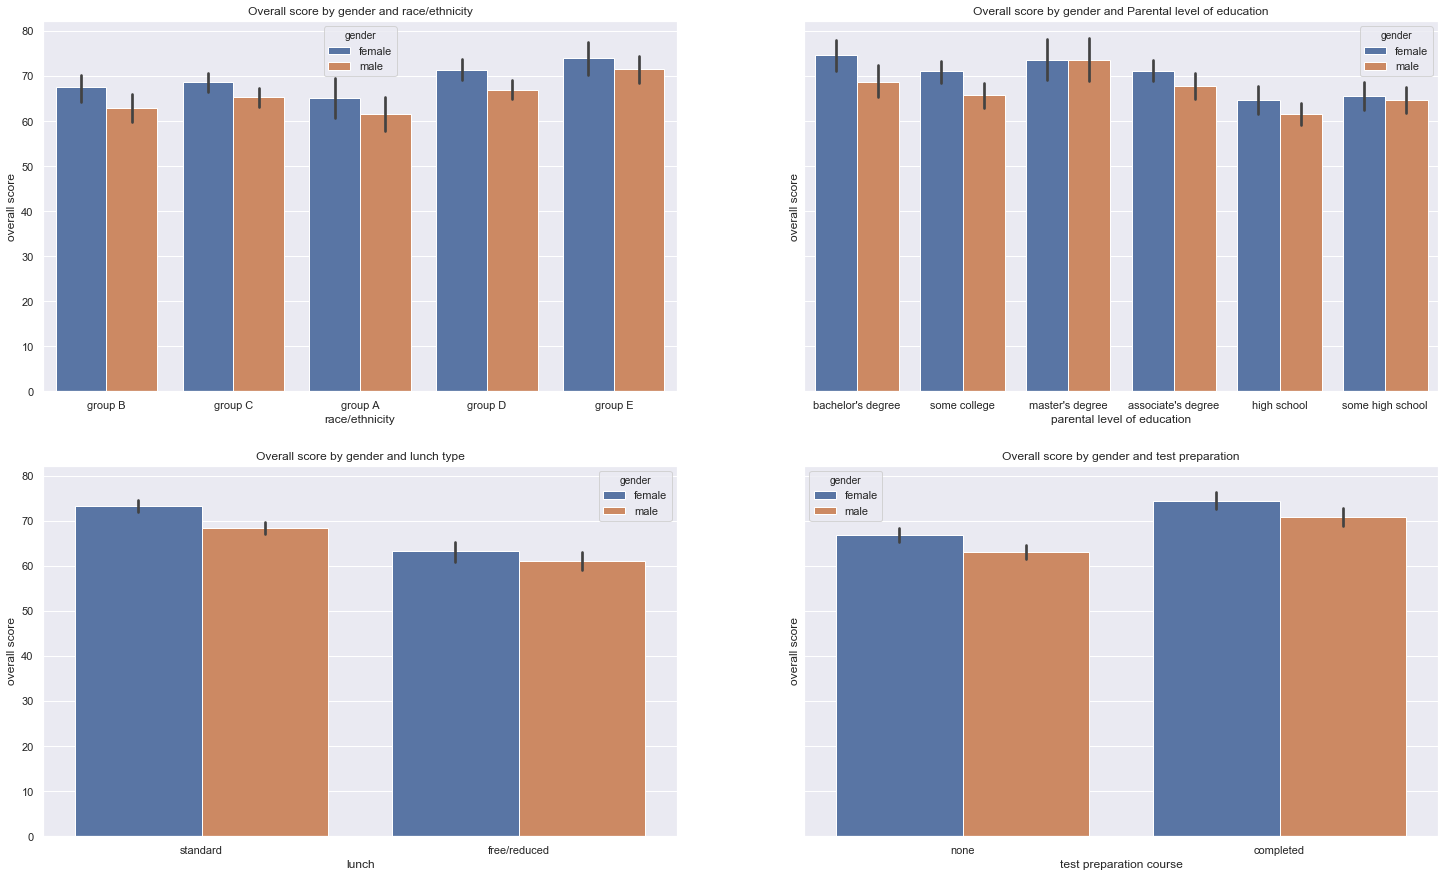

In [47]:
#Explore scores by parental level of education
fig, axs = plt.subplots(ncols=2, nrows=2,  figsize=(25, 15), sharey = True)
sns.barplot(x=df['race/ethnicity'], y=df['overall score'], hue=df['gender'], ax=axs[0][0]).set_title('Overall score by gender and race/ethnicity')
sns.barplot(x=df['parental level of education'], y=df['overall score'], hue=df['gender'], ax=axs[0][1]).set_title('Overall score by gender and Parental level of education')
sns.barplot(x=df['lunch'], y=df['overall score'], hue=df['gender'], ax=axs[1][0]).set_title('Overall score by gender and lunch type')
sns.barplot(x=df['test preparation course'], y=df['overall score'], hue=df['gender'], data=df, ax=axs[1][1]).set_title('Overall score by gender and test preparation')

plt.show()

#### Transformation of non-normal, target features: Math, Reading and writing

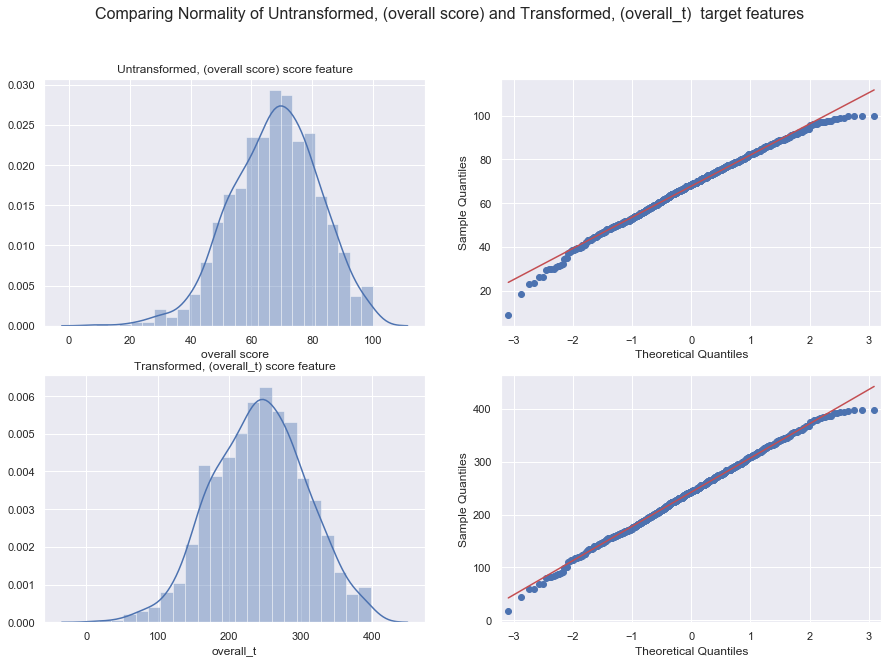

<Figure size 360x3600 with 0 Axes>

overall score - Reject null. Not normal
p=0.0005 

overall_t - Fail to reject null. Normal
p=0.2498 



In [48]:
#Transform the math score to normalize it.
import math as m

#Test of Normality for the Math score
from statsmodels.graphics.gofplots import qqplot
from scipy import stats

def transform_vars(untransformed, transformed):
    # Transformation of math score
    x = lambda x: (m.pow(x,1.3))
    df_t = df['{}'.format(untransformed)].apply(x)
    df['{}'.format(transformed)] = pd.Series(df_t, index=df.index) 

    
# Plot both Untransformed and Transformed plots of test performance
def compare_normality(untransformed, transformed):
    fig, axs = plt.subplots(ncols=2, nrows = 2, figsize=(15, 10))
    plt.figure(figsize=(5,50))
    f = sns.distplot(df['{}'.format(untransformed)], ax=axs[0][0]).set_title('Untransformed, ({}) score feature'.format(untransformed))
    f = sns.distplot(df['{}'.format(transformed)], ax=axs[1][0]).set_title('Transformed, ({}) score feature'.format(transformed))
    f = qqplot(df['{}'.format(untransformed)], line='s', ax=axs[0][1]) 
    f = qqplot(df['{}'.format(transformed)], line='s', ax=axs[1][1]) 
    fig.suptitle('Comparing Normality of Untransformed, ({}) and Transformed, ({})  target features'.format(untransformed, transformed), fontsize=16)

    plt.show()
    
#Test the normality of the original and transformed scores
def checkNormal(var):
    k2, p = stats.normaltest(df['{}'.format(var)])
    alpha = 0.05
    if p < alpha:
        print(var,"- Reject null. Not normal")
    else:
        print(var,"- Fail to reject null. Normal")
    p = round(p,4)    
    print ("p={}".format(p), "\n")


# Math
transform_vars('overall score', 'overall_t')
compare_normality('overall score','overall_t')
checkNormal('overall score') #Untransformed math score
checkNormal('overall_t') #Transformed math score



### Create X and Y datasets

In [49]:
#Since the predictors are categorical, consider using ANOVA?
#For 1b, use categorical variable without dummying.

# from statsmodels.formula.api import ols

# fit = ols("Q('overall score') ~ C(gender) + C(lunch) + C(Q('race/ethnicity')) + C(Q('parental level of education')) + C(Q('test preparation course'))", data=df).fit()
# fit.summary()


#before spliting data, create dummies for categorical variables (drop first column of each dummy group to avoid multicollinearity)
df_d = pd.get_dummies(df, columns=['gender', 'race/ethnicity', 'lunch', 'test preparation course'], drop_first=True)
df2 = df_d.drop(['math score', 'writing score', 'reading score', 'overall_t'], axis=1)
df2.head()
# df_keep 

,parental level of education,overall score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,lunch_standard,test preparation course_none
0,bachelor's degree,72.666667,0,1,0,0,0,1,1
1,some college,82.333333,0,0,1,0,0,1,0
2,master's degree,92.666667,0,1,0,0,0,1,1
3,associate's degree,49.333333,1,0,0,0,0,0,1
4,some college,76.333333,1,0,1,0,0,1,1


In [50]:
df2['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [51]:
#Recategorize the parental education to reflect it's ordinal nature

recat_parent_ed = {"some high school":1,
                                      "high school":2,
                                      "some college":3,
                                      "associate's degree":4,
                                      "bachelor's degree":5,
                                      "master's degree":6}

#Then, replace the feature in the DataFrame
df2.replace(recat_parent_ed, inplace=True)
# df2["parental level of education"]=df["parental level of education"].replace(recat_parent_ed, inplace=True)

df2.head()


,parental level of education,overall score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,lunch_standard,test preparation course_none
0,5,72.666667,0,1,0,0,0,1,1
1,3,82.333333,0,0,1,0,0,1,0
2,6,92.666667,0,1,0,0,0,1,1
3,4,49.333333,1,0,0,0,0,0,1
4,3,76.333333,1,0,1,0,0,1,1


In [52]:
df2.dtypes

parental level of education       int64
overall score                   float64
gender_male                       uint8
race/ethnicity_group B            uint8
race/ethnicity_group C            uint8
race/ethnicity_group D            uint8
race/ethnicity_group E            uint8
lunch_standard                    uint8
test preparation course_none      uint8
dtype: object

In [53]:
df2["parental level of education"] = df2["parental level of education"].astype('category')
df2["parental education"] = df2["parental level of education"].cat.codes



In [54]:
df2 = df2.drop(['parental level of education'], axis=1)
df2.head()

,overall score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,lunch_standard,test preparation course_none,parental education
0,72.666667,0,1,0,0,0,1,1,4
1,82.333333,0,0,1,0,0,1,0,2
2,92.666667,0,1,0,0,0,1,1,5
3,49.333333,1,0,0,0,0,0,1,3
4,76.333333,1,0,1,0,0,1,1,2


In [55]:
# Split data into x and y
X = df2.drop(['overall score'], axis=1)
y = df2['overall score']
# X.head()

In [56]:
y.head()

0    72.666667
1    82.333333
2    92.666667
3    49.333333
4    76.333333
Name: overall score, dtype: float64

### Train and Test Models

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

interaction = PolynomialFeatures(degree=3, include_bias=False, interaction_only=True)
X_inter_train = interaction.fit_transform(X_train)
X_inter_test = interaction.fit_transform(X_test)


### Random Forest to Improve Regression Model

In [58]:
from sklearn.ensemble import RandomForestRegressor

In [59]:
forest_reg = RandomForestRegressor(n_estimators=10,criterion='mse',random_state=101)
forest_reg.fit(X_train,y_train)
print('Random Forest R squared": %.4f' % forest_reg.score(X_test, y_test))

Random Forest R squared": 0.0047


C:\Users\dewum\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


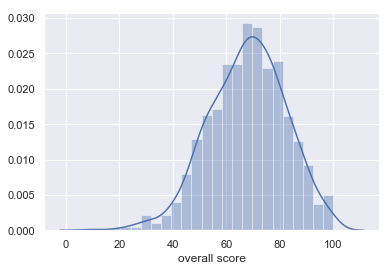

In [60]:
sns.set()
y_dist = sns.distplot(y)

In [61]:
y.describe()

count    1000.000000
mean       67.770667
std        14.257326
min         9.000000
25%        58.333333
50%        68.333333
75%        77.666667
max       100.000000
Name: overall score, dtype: float64

### Based on the distribution, scores below 68 will be considered 'Fail', those from 68 and above will be considered 'Pass'

In [62]:
from sklearn.preprocessing import Binarizer

Binarizer(threshold=68.333332, copy=True)

Binarizer(copy=True, threshold=68.333332)

In [63]:
# y.reshape(1, -1)
# transformer = Binarizer().fit(X,y)
y.head()

0    72.666667
1    82.333333
2    92.666667
3    49.333333
4    76.333333
Name: overall score, dtype: float64

In [64]:
bins = [0,68.3333, np.inf]
names=[0,1]
y_bin=pd.cut(y,bins, labels = names)

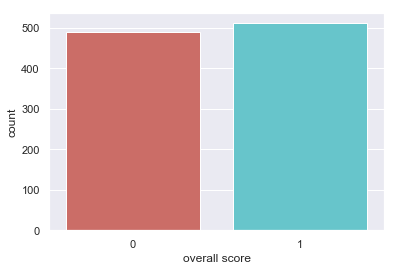

In [65]:
#Check distribution of new pass/fail variable from overall
# student performance
sns.countplot(x=y_bin, palette='hls')
plt.show()

In [66]:
# Check that the target feature is balanced
y_bin.value_counts()

1    511
0    489
Name: overall score, dtype: int64

In [67]:
X_train, X_test, y_train_bin, y_test_bin = train_test_split(X, y_bin, test_size=0.3, random_state=40)

### Fit Logistic Regression Model

In [68]:
from sklearn.linear_model import LogisticRegression
logM = LogisticRegression()
logM.fit(X_train, y_train_bin)
pred_bin = logM.predict(X_test)


C:\Users\dewum\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [69]:
from sklearn.metrics import classification_report
print(classification_report(y_test_bin,pred_bin))

              precision    recall  f1-score   support

           0       0.70      0.64      0.67       151
           1       0.66      0.72      0.69       149

   micro avg       0.68      0.68      0.68       300
   macro avg       0.68      0.68      0.68       300
weighted avg       0.68      0.68      0.68       300



In [70]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test_bin, pred_bin))
print("Precision:",metrics.precision_score(y_test_bin, pred_bin))
print("Recall:",metrics.recall_score(y_test_bin, pred_bin))


Accuracy: 0.68
Precision: 0.6645962732919255
Recall: 0.7181208053691275


### Try Random Classifier to improve model

In [71]:
 # Now, try RF Classifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [72]:
forest_reg = RandomForestRegressor(n_estimators=10,criterion='mse',random_state=101)

In [73]:
y_train_bin.head()

154    0
715    1
680    1
129    0
760    0
Name: overall score, dtype: category
Categories (2, int64): [0 < 1]

In [74]:
# y2 = pd.DataFrame(y_train_bin.astype(int))
y3 = y_train_bin.ravel()

In [262]:
classifier=RandomForestClassifier(n_estimators=100, n_jobs=10)
# y_trainy_train_bin.astype(int)
classifier.fit(X_train,y3)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=10,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [263]:
#Apply classifier to test data
print('Random Forest R squared": %.4f' % classifier.score(X_test, y_test_bin))
# classifier.predict(X_test)

Random Forest R squared": 0.5333


### Now Trying XGBoost

In [269]:
import xgboost as xgb
from sklearn.metrics import roc_auc_score
# from sklearn.grid_search import GridSearchCV
clf = xgb.XGBClassifier( learning_rate =0.05, n_estimators=1000, max_depth=10, min_child_weight=1, gamma=0, subsample=0.9, colsample_bytree=0.9,
                         objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=10)

In [270]:
clf.fit(X_train, y_train_bin, early_stopping_rounds=15,  eval_metric="logloss", eval_set=[(X_test, y_test_bin)])

[0]	validation_0-logloss:0.689474
Will train until validation_0-logloss hasn't improved in 15 rounds.
[1]	validation_0-logloss:0.684448
[2]	validation_0-logloss:0.681735
[3]	validation_0-logloss:0.677997
[4]	validation_0-logloss:0.674564
[5]	validation_0-logloss:0.671449
[6]	validation_0-logloss:0.668319
[7]	validation_0-logloss:0.667071
[8]	validation_0-logloss:0.665433
[9]	validation_0-logloss:0.66469
[10]	validation_0-logloss:0.662864
[11]	validation_0-logloss:0.662748
[12]	validation_0-logloss:0.661312
[13]	validation_0-logloss:0.660588
[14]	validation_0-logloss:0.660087
[15]	validation_0-logloss:0.658711
[16]	validation_0-logloss:0.658442
[17]	validation_0-logloss:0.658113
[18]	validation_0-logloss:0.658906
[19]	validation_0-logloss:0.659022
[20]	validation_0-logloss:0.658808
[21]	validation_0-logloss:0.659245
[22]	validation_0-logloss:0.659379
[23]	validation_0-logloss:0.659817
[24]	validation_0-logloss:0.660041
[25]	validation_0-logloss:0.659998
[26]	validation_0-logloss:0.66045

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.9, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=4, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=10, silent=True,
       subsample=0.9)

In [271]:
def best_ntree_score(estimator, X, y):
    """
    This scorer uses the best_ntree_limit to return
    the best AUC ROC score
    """
    try:
        y_predict = clf.predict_proba(X,ntree_limit=clf.best_ntree_limit)
    except AttributeError:
        y_predict = clf.predict_proba(X_test)
    return roc_auc_score(y, y_predict[:, 1])


print ('AUC ROC Score:',round((best_ntree_score(clf, X_train, y3)*100),4))

AUC ROC Score: 80.1745
